# Introduction

This Project will involve around three areas in data analytics.
First, we will tell the story about car and explore the car sales data to the best of knowing how.

Next we will create a model that classifies cars into either High class, Mid class, Low class based on specs of the car.
This means we will use K-means which is an unsupervised clustering model that groups objects into similar clusters.
K in this case is the number of clusters. We will use the elbow method to get K.

Finally, In our analysis of this data, we will Predict sales of the car given various specs of the vehicle

In the second version of the car project, we will create data pipelines for this models and deploy them into apps and/or dashboards for proper data story telling. 

# Chapter 1: EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Cardata = pd.read_csv('Cardata.csv')
Cardata.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
Cardata.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [4]:
Cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


<Axes: xlabel='Gender', ylabel='count'>

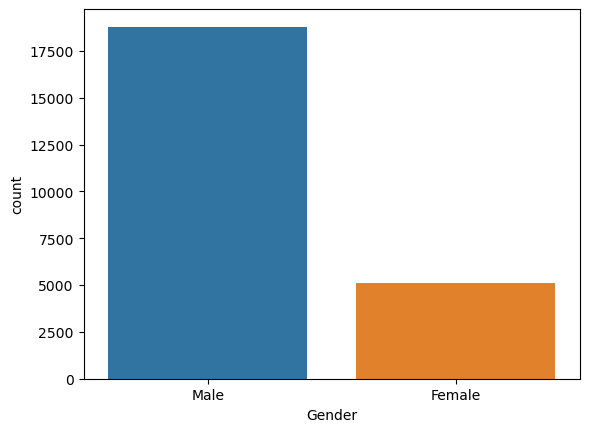

In [5]:
#How is the gender distribution in the purchase of cars
sns.countplot(data = Cardata, x= 'Gender')

##Most men are seen to be the ones purchasing cars as compared to women with men being more than three times the number
## of women

<Axes: xlabel='Color', ylabel='count'>

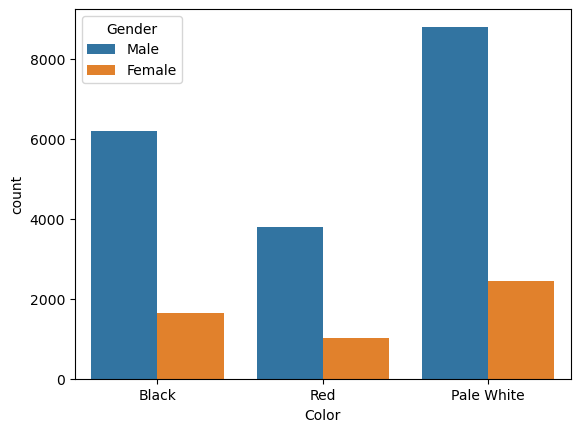

In [6]:
sns.countplot(data = Cardata, x = "Color", hue = 'Gender')
## The most in demand colour is pale white followed by black then red. The order is the same 
## For the two genders.

In [7]:
Cardata['Model'].nunique()
## There are 154 unique models in the car data

154

In [8]:
Cardata['Dealer_Name'].unique()

array(["Buddy Storbeck's Diesel Service Inc", 'C & M Motors Inc',
       'Capitol KIA', 'Chrysler of Tri-Cities', 'Chrysler Plymouth',
       'Classic Chevy', 'Clay Johnson Auto Sales', 'U-Haul CO',
       'Rabun Used Car Sales', 'Race Car Help', 'Saab-Belle Dodge',
       'Scrivener Performance Engineering', 'Diehl Motor CO Inc',
       'Star Enterprises Inc', 'Suburban Ford', 'Tri-State Mack Inc',
       'Progressive Shippers Cooperative Association No',
       'Ryder Truck Rental and Leasing', 'Enterprise Rent A Car',
       'Gartner Buick Hyundai Saab', 'Hatfield Volkswagen',
       'Iceberg Rentals', 'McKinney Dodge Chrysler Jeep',
       'Motor Vehicle Branch Office', 'Nebo Chevrolet',
       'New Castle Ford Lincoln Mercury', 'Pars Auto Sales',
       'Pitre Buick-Pontiac-Gmc of Scottsdale'], dtype=object)

In [9]:
Cardata['Dealer_Name'].nunique()
## There are 28 dealers in the car industry , we can therefore analyse dealer data

28

In [10]:
Cardata.groupby('Company')['Company'].aggregate('count').sort_values(ascending = False)
## From the data, the top 5 most selling companies are Chevrolet, dodge, Ford, Volkswagen and Mercedes B class. 
## Jaguar has the least amount of sales 

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: Company, dtype: int64

In [11]:
Cardata['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

<Axes: xlabel='Body Style', ylabel='count'>

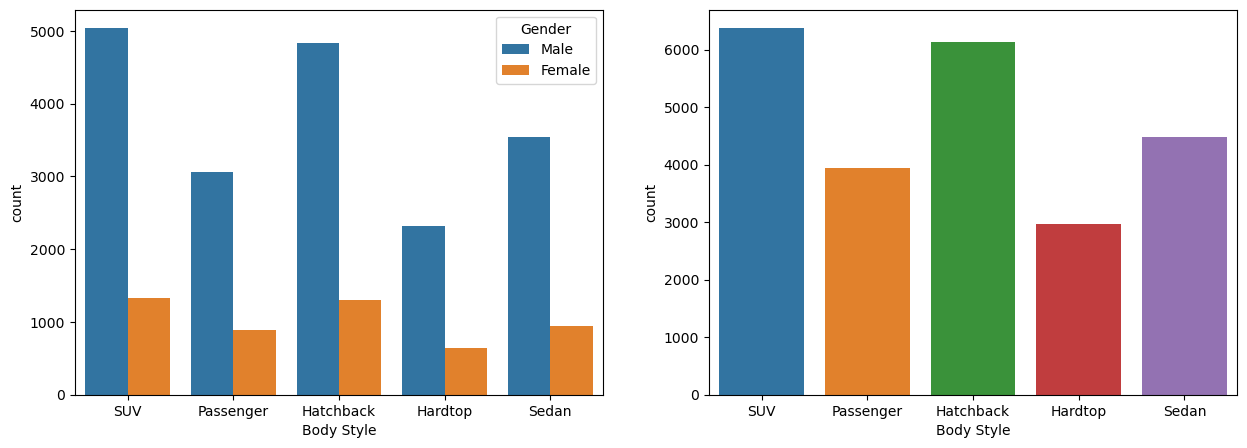

In [12]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(data = Cardata, x = "Body Style", hue = 'Gender')

plt.subplot(1,2,2,)
sns.countplot(data = Cardata, x = "Body Style")

## The trends of counts is similar in general case and also for both genders.
##SUV takes the dayy followed by hatchback

# Chapter 2: Price Prediction models

The models that will be in use here are the Random Forest and regression models with XGboost

In [13]:
new_car_data = pd.get_dummies(Cardata, columns= ['Gender', 'Transmission'], drop_first= True)
(new_car_data)

,Car_id,Date,Customer Name,Annual Income,Dealer_Name,Company,Model,Engine,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Gender_Male,Transmission_Manual
0,C_CND_000001,1/2/2022,Geraldine,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Black,26000,06457-3834,SUV,8264678,Middletown,True,False
1,C_CND_000002,1/2/2022,Gia,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Black,19000,60504-7114,SUV,6848189,Aurora,True,False
2,C_CND_000003,1/2/2022,Gianna,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Red,31500,38701-8047,Passenger,7298798,Greenville,True,True
3,C_CND_000004,1/2/2022,Giselle,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Pale White,14000,99301-3882,SUV,6257557,Pasco,True,True
4,C_CND_000005,1/2/2022,Grace,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Red,24500,53546-9427,Hatchback,7081483,Janesville,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Red,12000,60504-7114,Passenger,8583598,Pasco,True,True
23902,C_CND_023903,12/31/2023,Jimmy,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Black,16000,06457-3834,Hardtop,7914229,Middletown,False,False
23903,C_CND_023904,12/31/2023,Emma,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Red,21000,99301-3882,Sedan,7659127,Scottsdale,True,True
23904,C_CND_023905,12/31/2023,Victoire,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Black,31000,53546-9427,Passenger,6030764,Austin,True,False


At this point I discovered that there is alot of feature engineering to be done to the data.

First, factors such as dealername, company, model, engine, color, body style and dealer region are very valuable where determining the value or price of the car is concerned. I intend to label encode the data see if the following factors can be well interpreted by the linear regression model. 

In [14]:
classData = new_car_data[['Dealer_Name', 'Company', 'Model','Engine', 'Color', 'Body Style']]
classData.head()

,Dealer_Name,Company,Model,Engine,Color,Body Style
0,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Black,SUV
1,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Black,SUV
2,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Red,Passenger
3,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Pale White,SUV
4,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Red,Hatchback


In [15]:
from sklearn.preprocessing import LabelEncoder
classData = classData.apply(LabelEncoder().fit_transform)

In [16]:
## here the data is already label encoded. The next stage is to add the numerical columns
classData.head()

,Dealer_Name,Company,Model,Engine,Color,Body Style
0,0,8,60,0,0,3
1,1,7,52,0,0,3
2,2,4,57,1,2,2
3,4,27,36,1,1,3
4,3,0,141,0,2,1


In [17]:
classData[['Income', 'Price', 'Gender_male', 'Transmission_manual']] = new_car_data[['Annual Income','Price ($)','Gender_Male', 'Transmission_Manual']]
classData = classData.replace({True: 1, False :0})
classData.head()

,Dealer_Name,Company,Model,Engine,Color,Body Style,Income,Price,Gender_male,Transmission_manual
0,0,8,60,0,0,3,13500,26000,1,0
1,1,7,52,0,0,3,1480000,19000,1,0
2,2,4,57,1,2,2,1035000,31500,1,1
3,4,27,36,1,1,3,13500,14000,1,1
4,3,0,141,0,2,1,1465000,24500,1,0


In [18]:
## The first model will be the regression model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [19]:
## Split the data into train and test dataset

x_train, x_test, y_train, y_test = train_test_split(classData.drop('Price', axis= 1), classData['Price'], test_size= 0.3, random_state= 101)

In [20]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))

0.0037204023717384294


The linear regression is doing a not so good job with a 0.37% regression score which is relatively low

The next model to test is random forests

However, the prices for different makes and models of cars are numerous and there is a need to feature engineer.
The prices will be classified from A to F to simplify prediction of the price class.

Additionally, it transforms our problem from a regression problem to classification problem.

In [21]:
new_car_data['Price ($)'].describe()

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64

In [22]:
def priceClassifier(inpt):
    priceclass = []
    for n in inpt:
        if n <= 15000:
            priceclass.append('A')
        elif n <= 30000:
            priceclass.append('B')
        elif n <= 45000:
            priceclass.append('C')
        elif n <=60000:
            priceclass.append('D')
        elif n <= 75000:
            priceclass.append('E')
        else:
            priceclass.append('F')
    return(priceclass)

In [23]:
new_car_data['PriceClass'] = priceClassifier(new_car_data['Price ($)'])

In [24]:
new_car_data.head()

,Car_id,Date,Customer Name,Annual Income,Dealer_Name,Company,Model,Engine,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Gender_Male,Transmission_Manual,PriceClass
0,C_CND_000001,1/2/2022,Geraldine,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Black,26000,06457-3834,SUV,8264678,Middletown,True,False,B
1,C_CND_000002,1/2/2022,Gia,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Black,19000,60504-7114,SUV,6848189,Aurora,True,False,B
2,C_CND_000003,1/2/2022,Gianna,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Red,31500,38701-8047,Passenger,7298798,Greenville,True,True,C
3,C_CND_000004,1/2/2022,Giselle,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Pale White,14000,99301-3882,SUV,6257557,Pasco,True,True,A
4,C_CND_000005,1/2/2022,Grace,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Red,24500,53546-9427,Hatchback,7081483,Janesville,True,False,B


In [25]:
## here we do some label encoding
categorical_data = new_car_data.select_dtypes(include = object).apply(LabelEncoder().fit_transform)
numerical_data = pd.DataFrame(new_car_data.select_dtypes(exclude = object))
data2 = pd.concat([numerical_data, categorical_data], axis = 1)
data2 = pd.DataFrame(data2)
data2.head()

,Annual Income,Price ($),Phone,Gender_Male,Transmission_Manual,Car_id,Date,Customer Name,Dealer_Name,Company,Model,Engine,Color,Dealer_No,Body Style,Dealer_Region,PriceClass
0,13500,26000,8264678,True,False,0,11,1050,0,8,60,0,0,0,3,4,1
1,1480000,19000,6848189,True,False,1,11,1057,1,7,52,0,0,3,3,0,1
2,1035000,31500,7298798,True,True,2,11,1061,2,4,57,1,2,1,2,2,2
3,13500,14000,6257557,True,True,3,11,1068,4,27,36,1,1,6,3,5,0
4,1465000,24500,7081483,True,False,4,11,1083,3,0,141,0,2,2,1,3,1


In [26]:
## change the categorical gender and transmission into numerical
data2= data2.replace({True: 1, False:0})

In [27]:
##the random forest model
## first we split data into train and test
x_train, x_test, y_train, y_test = train_test_split(data2.drop(['Price ($)', 'PriceClass', 'Phone', 'Car_id', 'Date', 'Customer Name'], axis= 1), data2['PriceClass'], test_size= 0.3, random_state= 101)

In [28]:
## This is to confirm whether all variables are
x_train.head()

,Annual Income,Gender_Male,Transmission_Manual,Dealer_Name,Company,Model,Engine,Color,Dealer_No,Body Style,Dealer_Region
10642,13500,1,1,8,2,4,1,2,3,4,2
6310,13500,1,1,27,27,44,1,1,4,2,1
18016,13500,1,0,19,6,2,0,2,5,3,6
23566,407800,0,0,25,22,75,0,2,2,2,5
8360,920000,1,1,16,27,136,1,0,1,2,2


In [29]:
## I was curious to try regression model given that y is price classes and not individual prices 
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))
#Still, the regression score was low, but slightly higher than the one with individual prices
#Regression for price prediction in this case is highly unreliable

0.005455873567583369


In [31]:
#We then will try random forests and see what goes with it
# Lets import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(x_test)

In [34]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.7834634690462912

78% accuracy is way higher and better as compared to our resulting output in reression model.

Let us see the maximum accuracy we can achieve given that we try to optimize the model

For hyperparameter tuning we will use randomizedsearchCV. The parameters to be tuned in random forest are n-estimators -> these are the number of decision trees in the forest and max_depth which affects how deep a decison tree can go.

In [48]:
from random import randint
params = { 'n_estimators': list(range(50,500)),
          'max_depth': list(range(1,20))  
}

randsearch_rf = RandomizedSearchCV(rf, param_distributions=params, n_iter=5, cv=5)
randsearch_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [50, 51, 52, 53, 54, 55,
                                                         56, 57, 58, 59, 60, 61,
                                                         62, 63, 64, 65, 66, 67,
                                                         68, 69, 70, 71, 72, 73,
                                                         74, 75, 76, 77, 78, 79, ...]})

In [50]:
#Lets see the best hyperparameters
print('The best parameters are: ' ,randsearch_rf.best_params_)

The best parameters are:  {'n_estimators': 297, 'max_depth': 16}


In [52]:
# the code below creates a variable for the best model and prints the hyperparameters
best_rf = randsearch_rf.best_estimator_

##The next thing is to generate predictions with the best model
y_pred_rsCV = best_rf.predict(x_test)

##Get the confusion matrix
cm_RSCV = confusion_matrix(y_test, y_pred_rsCV)

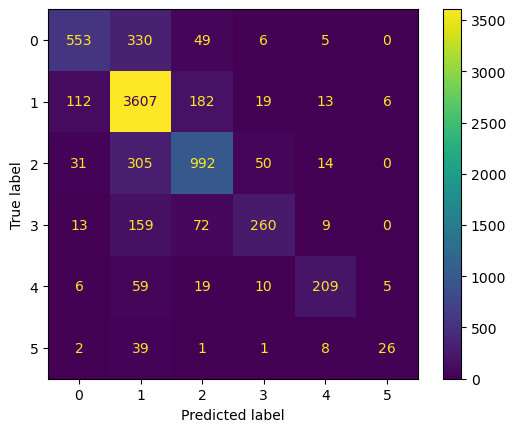

In [53]:
## Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_RSCV).plot()

In [55]:
hyper_accuracy = accuracy_score(y_test, y_pred_rsCV)
hyper_accuracy


0.7873675404350251

Even after hyperparameter tuning, the best we could achieve for the model is 78.7% accuracy. 

Let us get to see in a plot the most influential/ important feature in culminating to the price of the car

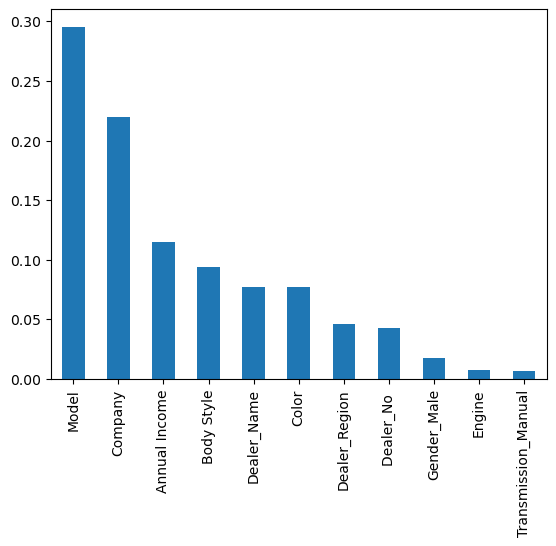

In [56]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

From the model, it is evident that the most important features in determining the price of a vehicle in which a customer buys is in the model, company, customer purchasing power, body style car dealer name and color in that order. 